In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import statistics
import random
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics

#load data
df = pd.read_csv("48_Industry_Portfolios_daily_3a.csv")
#df.columns
df.columns = df.columns.str.strip()  # this is to correct the name of the headers e.g "Beer" not "Beer "

df = df.replace('NaN', np.nan, regex=True)  # It reads 'Nan' as a string and not as a n/a value.

df.dropna(how="any", inplace=True)

df.reset_index(drop=True, inplace=True) # resets the index after dropna in order to start from 0

df.head()

#type(df.Day[0])

df['Day'] = pd.to_datetime(df['Day'], format='%Y%m%d')  

for col in df.columns[1:]:
    df[col]=pd.to_numeric(df[col], errors='coerce')
df.head()

C:\Users\kwsta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,11,15,20,26,27,33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Day,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,1969-07-01,0.54,0.55,-0.19,0.43,0.84,0.91,1.15,-0.04,0.69,...,0.29,0.81,0.39,0.43,1.36,0.20,0.30,1.44,0.07,3.69
1,1969-07-02,0.89,1.27,0.51,1.02,0.95,2.44,0.35,0.28,0.83,...,1.71,0.76,1.27,0.08,1.37,1.42,0.72,1.74,0.16,-0.04
2,1969-07-03,-0.17,0.69,0.57,1.49,-0.02,1.51,0.51,0.61,0.75,...,1.01,0.68,0.96,0.12,1.38,2.24,-0.21,1.39,1.35,2.58
3,1969-07-07,1.27,-0.65,-0.61,0.42,-0.26,-1.07,-1.84,0.30,-0.52,...,-0.47,-1.21,-0.42,-0.51,-0.66,-0.74,-1.52,-2.33,-0.86,-2.26
4,1969-07-08,-0.71,-0.56,-0.94,-0.21,-1.36,-2.04,-2.36,-0.66,-1.38,...,-1.39,-1.35,-1.36,-1.29,-2.48,-0.88,-1.39,-1.90,-1.54,-1.77


In [2]:
dftrial = df.iloc[:,1:]

dftrial.head()

dftrial.head()
noise = np.array(dftrial)

for rows in range(len(noise)):
    for col in range(len(noise[0,:])):
        #noise[rows,col] += np.random.uniform(-1,1)
        noise[rows,col] += np.random.uniform(-0.1,0.1)
print((noise[0,:]))

dftrial = pd.DataFrame(noise,columns = df.columns[1:])
dftrial.head()

[ 0.54111094  0.45854093 -0.20710783  0.51802909  0.81196638  0.98426193
  1.19654513  0.02116581  0.71008125  0.28226772 -0.98954041  0.50071583
  0.60133378  0.26672948  1.4468666   0.67691186  0.71033431  0.24580133
  1.07102908  1.31840454  0.80520492 -1.66146029  0.39466658 -0.06181459
  0.58905719 -0.32811727  0.33673883  0.7650499   2.38248962  1.10016124
  0.11362674 -0.72258515  1.64217398  2.3619836   0.26936187  0.75596206
  0.89160817 -0.11518593  0.380822    0.71318828  0.4741237   0.44978066
  1.42330828  0.26706776  0.29810061  1.481618   -0.00991002  3.75386315]


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,0.541111,0.458541,-0.207108,0.518029,0.811966,0.984262,1.196545,0.021166,0.710081,0.282268,...,0.380822,0.713188,0.474124,0.449781,1.423308,0.267068,0.298101,1.481618,-0.009910,3.753863
1,0.929043,1.191863,0.516696,0.969710,0.980374,2.353410,0.411973,0.283571,0.853887,0.486182,...,1.766533,0.740732,1.342089,0.026434,1.397995,1.412061,0.683484,1.675104,0.062177,-0.070987
2,-0.096421,0.636298,0.561265,1.457994,0.001583,1.552413,0.606930,0.666808,0.656026,0.558107,...,0.941995,0.678587,0.934444,0.121730,1.291258,2.220867,-0.132790,1.430479,1.434921,2.642021
3,1.339092,-0.738457,-0.611664,0.424148,-0.250877,-1.166757,-1.794001,0.277850,-0.610187,-0.462567,...,-0.455351,-1.225046,-0.445340,-0.431360,-0.664713,-0.781819,-1.467595,-2.248212,-0.807729,-2.202533
4,-0.635135,-0.461481,-0.882965,-0.290801,-1.354336,-1.963612,-2.323703,-0.734587,-1.334839,-1.830859,...,-1.344956,-1.313526,-1.439941,-1.306961,-2.448884,-0.895849,-1.315714,-1.950577,-1.496251,-1.815414


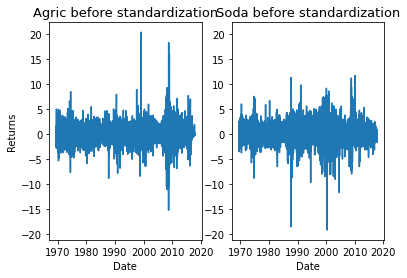

In [3]:
## Plot time series before Normalization
plt.figure()
ax1=plt.subplot(1,2,1)
plt.title('Agric before standardization',fontsize=13)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Returns',fontsize=10)
plt.plot(df['Day'],df['Agric'])

plt.subplot(1,2,2,sharey=ax1)
plt.title('Soda before standardization',fontsize=13)
plt.xlabel('Date',fontsize=10)
#plt.ylabel('Returns',fontsize=10)
plt.plot(df['Day'],df['Soda'])

In [4]:
## Normalization

for col in df.columns[1:]:
    df[col]=(df[col]-df[col].mean())/(df[col].std())
    


#print(df['Beer'],df['Beer'].mean(),df['Beer'].std())


#print(df['Beer'],df['Beer'].mean(),df['Beer'].std())

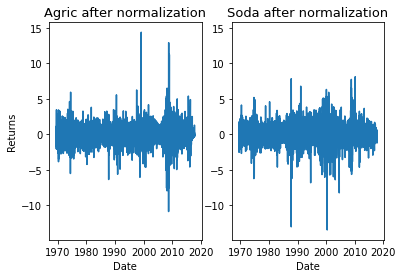

In [5]:
## Plot time series
plt.figure()
ax1=plt.subplot(1,2,1)
plt.title('Agric after normalization',fontsize=13)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Returns',fontsize=10)
plt.plot(df['Day'],df['Agric'])

plt.subplot(1,2,2,sharey=ax1)
plt.title('Soda after normalization',fontsize=13)
plt.xlabel('Date',fontsize=10)
#plt.ylabel('Returns',fontsize=10)
plt.plot(df['Day'],df['Soda'])

In [6]:
df1 = df
df1.drop(columns='Day')

X = df1.iloc[:,1:]
#print(X)
#type(X)

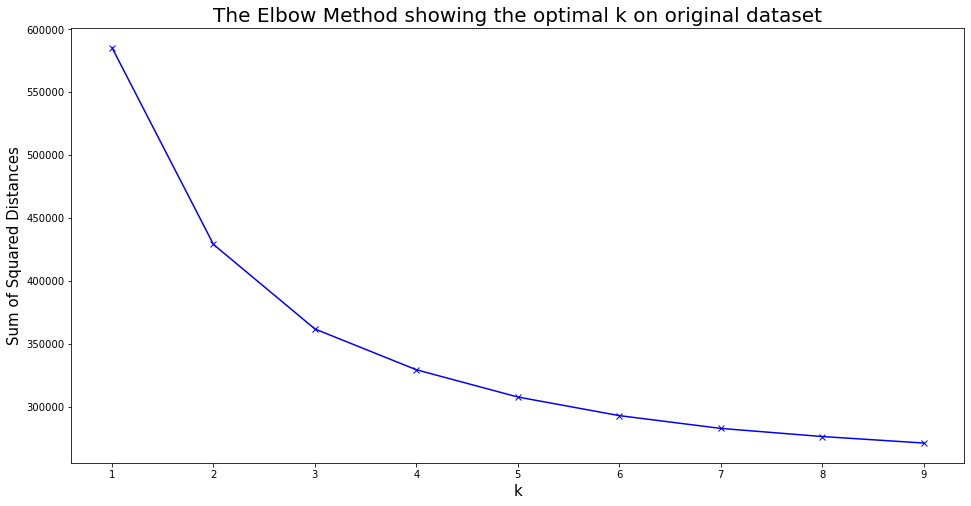

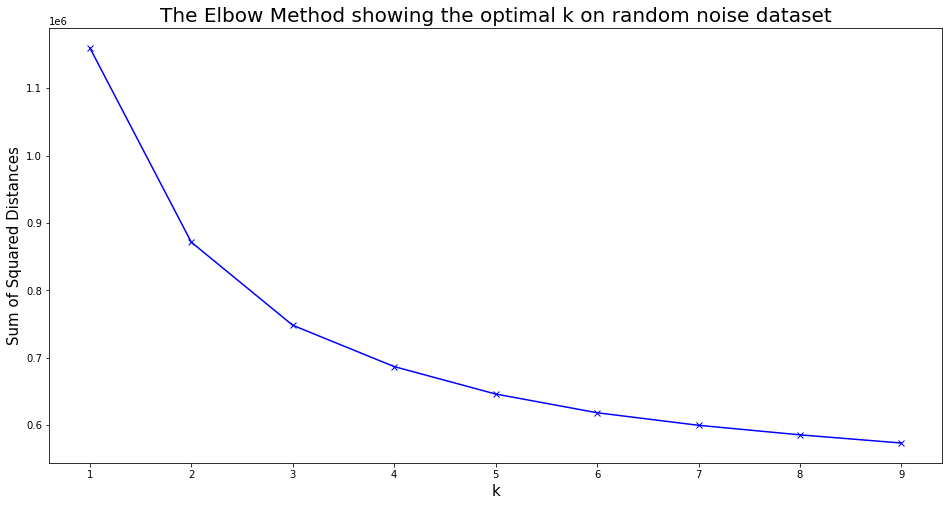

In [49]:
# Elbow Method for optimal k on original dataset
K = range(1,10)
Sum_of_squared_distances = []

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel = kmeanModel.fit(X)
    Sum_of_squared_distances.append(kmeanModel.inertia_)
    #distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
#plt.figure()
#ax1=plt.subplot(1,2,1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k',fontsize=15)
plt.ylabel('Sum of Squared Distances',fontsize=15)
plt.title('The Elbow Method showing the optimal k on original dataset',fontsize=20)
plt.show()


# Elbow Method for optimal k on random noise dataset
K = range(1,10)
Sum_of_squared_distances = []

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel = kmeanModel.fit(dftrial)
    Sum_of_squared_distances.append(kmeanModel.inertia_)
    #distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
#plt.subplot(1,2,2,sharey=ax1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k',fontsize=15)
plt.ylabel('Sum of Squared Distances',fontsize=15)
plt.title('The Elbow Method showing the optimal k on random noise dataset',fontsize=20)
plt.show()

In [8]:
#Implement K-means on original dataset
kmeans=KMeans(n_clusters=8,max_iter=100000,random_state=1)
normalizer=Normalizer()
pipeline=make_pipeline(normalizer,kmeans)

pipeline.fit(np.transpose(X))
predictions=pipeline.predict(np.transpose(X))

print(len(predictions))
print(predictions)

48
[1 3 3 3 4 3 1 1 3 1 1 3 3 1 1 1 1 1 6 1 1 1 1 1 1 1 2 6 6 6 0 0 1 5 5 5 5
 1 1 1 1 3 3 1 1 1 1 7]


In [9]:
#Implement K-means on random noise dataset
kmeans=KMeans(n_clusters=8,max_iter=100000,random_state=1)
normalizer=Normalizer()
pipeline=make_pipeline(normalizer,kmeans)

pipeline.fit(np.transpose(dftrial))
predictionsnoise=pipeline.predict(np.transpose(dftrial))

print(len(predictionsnoise))
print(predictionsnoise)

48
[1 3 3 3 4 3 1 1 3 1 1 3 3 1 1 1 1 1 6 1 1 1 1 1 1 1 2 6 6 6 0 0 1 5 5 5 5
 1 1 1 1 3 3 1 1 1 1 7]


In [10]:
dfg=pd.read_csv("48_Industry_Portfolios_daily_4a.csv",parse_dates= True, index_col= None, low_memory=False)
dfg.columns = dfg.columns.str.strip()  # this is to correct the name of the headers e.g "Beer" not "Beer "

dfg = dfg.replace('NaN', np.nan, regex=True)  # It reads 'Nan' as a string and not as a n/a value.

dfg.dropna(how="any", inplace=True)

dfg.reset_index(drop=True, inplace=True) # resets the index after dropna in order to start from 0

dfg.head()
dfg1=dfg
dfg1.info()
dfg1= dfg1.astype(float)
dfg1.info()
dfg1.isnull().any()
dfg1.isnull().sum()
dfg1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12196 entries, 0 to 12195
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Agric   12196 non-null  float64
 1   Food    12196 non-null  float64
 2   Soda    12196 non-null  object 
 3   Beer    12196 non-null  float64
 4   Smoke   12196 non-null  float64
 5   Toys    12196 non-null  float64
 6   Fun     12196 non-null  float64
 7   Books   12196 non-null  float64
 8   Hshld   12196 non-null  float64
 9   Clths   12196 non-null  float64
 10  Hlth    12196 non-null  object 
 11  MedEq   12196 non-null  float64
 12  Drugs   12196 non-null  float64
 13  Chems   12196 non-null  float64
 14  Rubbr   12196 non-null  object 
 15  Txtls   12196 non-null  float64
 16  BldMt   12196 non-null  float64
 17  Cnstr   12196 non-null  float64
 18  Steel   12196 non-null  float64
 19  FabPr   12196 non-null  object 
 20  Mach    12196 non-null  float64
 21  ElcEq   12196 non-null  float64
 22

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,0.54,0.55,-0.19,0.43,0.84,0.91,1.15,-0.04,0.69,0.38,...,0.29,0.81,0.39,0.43,1.36,0.20,0.30,1.44,0.07,3.69
1,0.89,1.27,0.51,1.02,0.95,2.44,0.35,0.28,0.83,0.48,...,1.71,0.76,1.27,0.08,1.37,1.42,0.72,1.74,0.16,-0.04
2,-0.17,0.69,0.57,1.49,-0.02,1.51,0.51,0.61,0.75,0.65,...,1.01,0.68,0.96,0.12,1.38,2.24,-0.21,1.39,1.35,2.58
3,1.27,-0.65,-0.61,0.42,-0.26,-1.07,-1.84,0.30,-0.52,-0.44,...,-0.47,-1.21,-0.42,-0.51,-0.66,-0.74,-1.52,-2.33,-0.86,-2.26
4,-0.71,-0.56,-0.94,-0.21,-1.36,-2.04,-2.36,-0.66,-1.38,-1.77,...,-1.39,-1.35,-1.36,-1.29,-2.48,-0.88,-1.39,-1.90,-1.54,-1.77


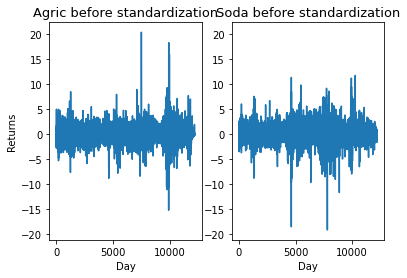

In [11]:
## Plot time series before Standardization
plt.figure()
ax1=plt.subplot(1,2,1)
plt.title('Agric before standardization',fontsize=13)
plt.xlabel('Day',fontsize=10)
plt.ylabel('Returns',fontsize=10)
plt.plot(dfg1['Agric'])

plt.subplot(1,2,2,sharey=ax1)
plt.title('Soda before standardization',fontsize=13)
plt.xlabel('Day',fontsize=10)
#plt.ylabel('Returns',fontsize=10)
plt.plot(dfg1['Soda'])

In [12]:
from sklearn.preprocessing import StandardScaler
df4=pd.DataFrame(StandardScaler().fit_transform(dfg1))
df4.columns= dfg1.columns
df4.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,0.347761,0.542887,-0.169791,0.326177,0.548666,0.591651,0.652767,-0.066304,0.592169,0.263575,...,0.189334,0.615516,0.327324,0.326221,1.034706,0.105616,0.214080,0.936183,0.011104,2.568687
1,0.595722,1.327554,0.318245,0.838614,0.627100,1.625385,0.172983,0.198276,0.719896,0.342328,...,1.300978,0.575254,1.157191,0.026323,1.042598,0.954466,0.573943,1.134109,0.072407,-0.042882
2,-0.155247,0.695461,0.360076,1.246827,-0.064543,0.997037,0.268940,0.471125,0.646909,0.476210,...,0.752985,0.510835,0.864851,0.060597,1.050490,1.525005,-0.222896,0.903195,0.882964,1.791518
3,0.864937,-0.764892,-0.462612,0.317492,-0.235671,-0.746123,-1.140425,0.214813,-0.511765,-0.382206,...,-0.405630,-1.011066,-0.436531,-0.479219,-0.559429,-0.548417,-1.345326,-1.551086,-0.622356,-1.597220
4,-0.537816,-0.666809,-0.692687,-0.229687,-1.020009,-1.401496,-1.452284,-0.578928,-1.296379,-1.429631,...,-1.125850,-1.123800,-1.322980,-1.147564,-1.995729,-0.645826,-1.233939,-1.267393,-1.085532,-1.254146


In [13]:
max(df4['Soda'])

8.105902308734134

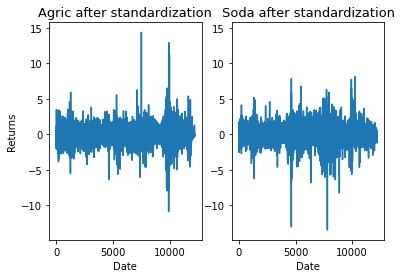

In [14]:
## Plot time series after Standardization
plt.figure()
ax1=plt.subplot(1,2,1)
plt.title('Agric after standardization',fontsize=13)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Returns',fontsize=10)
plt.plot(df4['Agric'])

plt.subplot(1,2,2,sharey=ax1)
plt.title('Soda after standardization',fontsize=13)
plt.xlabel('Date',fontsize=10)
#plt.ylabel('Returns',fontsize=10)
plt.plot(df4['Soda'])

In [15]:
df4.mean(axis=0)

Agric    1.417649e-17
Food    -3.280784e-17
Soda     2.066420e-18
Beer     6.699936e-18
Smoke    8.610464e-18
Toys    -6.517872e-18
Fun     -6.863793e-18
Books   -2.551164e-17
Hshld    8.739046e-19
Clths    3.233447e-17
Hlth     4.519726e-17
MedEq   -1.819724e-17
Drugs   -4.938472e-18
Chems    9.949768e-18
Rubbr   -1.656778e-18
Txtls    2.093730e-19
BldMt    7.919761e-18
Cnstr    1.092381e-18
Steel    3.040460e-18
FabPr    1.747354e-17
Mach     1.223239e-17
ElcEq   -2.734821e-17
Autos   -6.099126e-18
Aero    -1.979940e-17
Ships    3.231627e-18
Guns    -3.693613e-18
Gold     8.131410e-18
Mines    6.074092e-18
Coal    -5.915925e-18
Oil     -1.571663e-17
Util    -2.593039e-17
Telcm    2.476177e-17
PerSv   -1.751906e-17
BusSv    1.365021e-17
Comps    7.218816e-18
Chips    7.118682e-18
LabEq   -1.612627e-17
Paper    2.926670e-18
Boxes   -1.126063e-17
Trans   -1.643123e-17
Whlsl   -5.898856e-18
Rtail    1.042882e-18
Meals    1.340016e-17
Banks    2.852252e-17
Insur    1.835996e-18
RlEst    8

In [16]:
df4.std(axis=0)

Agric    1.000041
Food     1.000041
Soda     1.000041
Beer     1.000041
Smoke    1.000041
Toys     1.000041
Fun      1.000041
Books    1.000041
Hshld    1.000041
Clths    1.000041
Hlth     1.000041
MedEq    1.000041
Drugs    1.000041
Chems    1.000041
Rubbr    1.000041
Txtls    1.000041
BldMt    1.000041
Cnstr    1.000041
Steel    1.000041
FabPr    1.000041
Mach     1.000041
ElcEq    1.000041
Autos    1.000041
Aero     1.000041
Ships    1.000041
Guns     1.000041
Gold     1.000041
Mines    1.000041
Coal     1.000041
Oil      1.000041
Util     1.000041
Telcm    1.000041
PerSv    1.000041
BusSv    1.000041
Comps    1.000041
Chips    1.000041
LabEq    1.000041
Paper    1.000041
Boxes    1.000041
Trans    1.000041
Whlsl    1.000041
Rtail    1.000041
Meals    1.000041
Banks    1.000041
Insur    1.000041
RlEst    1.000041
Fin      1.000041
Other    1.000041
dtype: float64

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=48)
principalComponents = pca.fit_transform(df4)
a= np.arange(1,49)
principalDf = pd.DataFrame(data = principalComponents, columns= a )
#principalDf.rename(columns = {0 : 'Agric' , 1: 'Food', 2: 'Soda', 3: 'Beer', 4: 'Smoke', 5: 'Toys', 6: 'Fun', 7: 'Books', 8: 'Hshld', 9: 'Clths', 10: 'Hlth', 11: 'MedEq', 12: 'Drugs', 13:'Chems', 14:'Rubbr', 15: 'Txtls', 16:'BldMt', 17: 'Cnstr', 18: 'Steel', 19: 'FabPr', 20: 'Mach', 21: 'ElcEq', 22: 'Autos', 23: 'Aero', 24:'Ships', 25:'Guns', 26:'Gold', 27:'Mines', 28:'Coal', 29:'Oil', 30:'Util', 31:'Telcm', 32:'PerSv', 33:'BusSv', 34:'Comps', 35:' Chips', 36:'LabEq', 37:'Paper', 38:'Boxes', 39:'Trans', 40:'Whlsl', 41:'Rtail', 42:'Meals', 43:'Banks', 44:'Insur', 45:'RlEst', 46:'Fin', 47:'Other' }, inplace = True)
principalDf

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,-2.768683,-0.493806,0.184731,-0.043668,-0.034058,0.767926,0.694101,-0.302428,-0.271160,0.839808,...,0.267994,-0.231698,-0.413569,0.920042,-0.094908,-0.237692,-0.402983,0.711785,-0.566017,-0.147694
1,-4.476249,0.560782,0.354253,-0.215040,-1.000984,0.575930,0.962959,-0.292181,-0.415036,0.216514,...,-0.238231,0.013704,0.398031,-0.866504,0.106572,0.294312,0.488824,0.236089,-0.670311,0.009256
2,-4.022133,-0.518549,-0.279044,-0.224453,0.544947,0.885465,-0.652507,0.207160,-0.244098,-0.252134,...,-0.423251,-0.143227,0.149411,-0.302400,-0.966057,0.577351,-0.380660,-0.214501,-0.350929,0.155352
3,4.605064,0.299782,-0.430541,-0.351848,1.782809,-0.369638,-0.200528,-0.930336,1.183954,-0.242264,...,-0.068054,0.475270,-0.007412,-0.426674,-0.288079,0.349661,-0.104272,-0.062971,-0.028222,-0.034999
4,6.373601,-0.098054,-0.404084,0.210038,-0.318092,0.544906,1.281986,0.638550,-0.412442,-0.742140,...,-0.073000,-0.833050,-0.292182,-0.033320,-0.187255,0.304900,-0.206199,-0.575284,-0.203723,-0.217700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,3.347490,0.581191,0.540058,0.017379,0.351578,0.441806,-0.061343,-0.213278,0.307691,-0.232188,...,-0.172988,0.046641,-0.121388,-0.882037,0.377450,-0.033845,-0.516292,0.070257,-0.354643,0.123623
12192,-1.435660,-0.189280,1.299706,1.602227,1.515797,1.039607,-0.409253,-1.403570,0.154391,1.043534,...,-0.295294,-0.692013,0.206139,0.475901,0.709171,0.790955,-0.624907,0.629180,-0.098894,0.040576
12193,-0.384698,0.236966,1.202391,-1.045879,-0.001884,-0.044156,0.805413,1.179647,-0.109854,-0.875615,...,1.328820,-2.001208,-0.539077,1.110026,0.060341,-0.691549,-0.980693,-0.159417,-0.833439,0.517721
12194,3.508290,-1.128404,0.308414,-0.726594,-0.570341,-0.193978,-0.103797,0.033124,-0.172318,-0.362399,...,0.343110,0.064729,0.620458,0.041051,-0.000441,0.033428,-0.726458,-0.292848,-0.216737,0.661814


([<matplotlib.axis.XTick at 0x2b995c8d9d0>,
 <a list of 48 Text major ticklabel objects>)

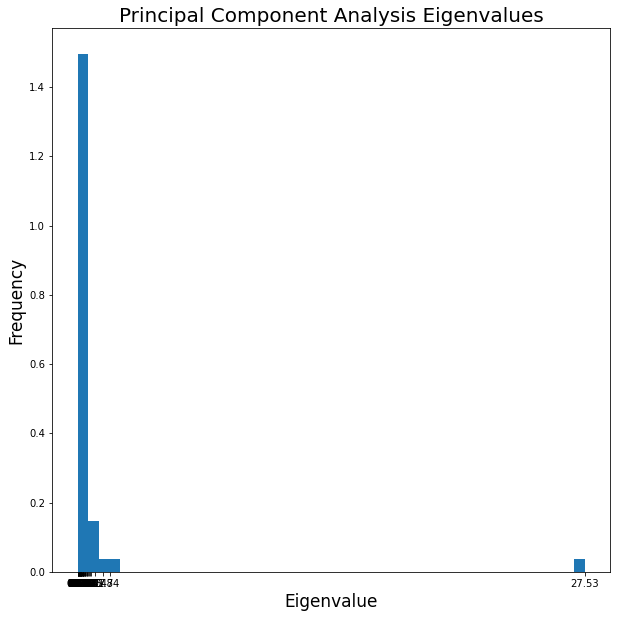

In [53]:
import matplotlib.pyplot as plt
eigenvalues= pca.explained_variance_
fig = plt.figure(figsize=(10,10))
plt.hist(eigenvalues, density= True, bins= 48 )
plt.title("Principal Component Analysis Eigenvalues",fontsize=20)
plt.ylabel("Frequency",fontsize=17)
plt.xlabel("Eigenvalue",fontsize=17)
plt.xticks(eigenvalues)
#plt.savefig('eigenvalues_distribution.png')

In [19]:
explained_variance= pca.explained_variance_
print(explained_variance)

#these are the eigen values. 1,2,3,4,5...48
explained_variance.sum()

[27.53048151  1.84209117  1.47386549  1.07307911  0.85374893  0.8017873
  0.72369451  0.65304123  0.64182193  0.61684992  0.56869445  0.52489002
  0.51471352  0.50309746  0.48805952  0.45434902  0.43141792  0.42618545
  0.4151338   0.40865544  0.39021067  0.38901069  0.35903091  0.35067344
  0.33022348  0.32651876  0.32059069  0.31132984  0.29689119  0.29278024
  0.28844121  0.2780812   0.26562936  0.25632312  0.25431552  0.23966334
  0.23409691  0.22549492  0.20739338  0.19867302  0.19189395  0.17924507
  0.17015189  0.16404079  0.15850309  0.14337399  0.12055932  0.11513831]


48.00393603936039

In [20]:
e= (explained_variance/48)
print(e)

[0.5735517  0.0383769  0.03070553 0.02235581 0.01778644 0.0167039
 0.01507697 0.01360503 0.01337129 0.01285104 0.0118478  0.01093521
 0.0107232  0.0104812  0.01016791 0.0094656  0.00898787 0.00887886
 0.00864862 0.00851365 0.00812939 0.00810439 0.00747981 0.0073057
 0.00687966 0.00680247 0.00667897 0.00648604 0.00618523 0.00609959
 0.00600919 0.00579336 0.00553394 0.00534007 0.00529824 0.00499299
 0.00487702 0.00469781 0.0043207  0.00413902 0.00399779 0.00373427
 0.00354483 0.00341752 0.00330215 0.00298696 0.00251165 0.00239871]


In [21]:
r=np.cumsum(explained_variance/48)
print(r)

[0.5735517  0.6119286  0.64263413 0.66498994 0.68277638 0.69948028
 0.71455725 0.72816228 0.74153357 0.75438461 0.76623241 0.77716762
 0.78789081 0.79837201 0.80853992 0.81800552 0.8269934  0.83587226
 0.84452088 0.85303454 0.86116392 0.86926831 0.87674812 0.88405382
 0.89093348 0.89773595 0.90441492 0.91090096 0.9170862  0.92318578
 0.92919498 0.93498833 0.94052228 0.94586234 0.95116058 0.95615357
 0.96103059 0.9657284  0.9700491  0.97418812 0.97818591 0.98192018
 0.98546501 0.98888253 0.99218468 0.99517163 0.99768329 1.000082  ]


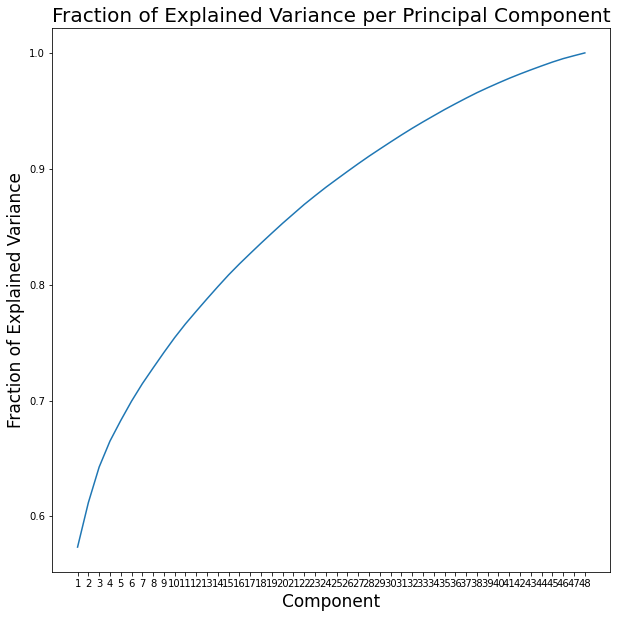

In [54]:
a=(np.arange(0,48))
fig = plt.figure(figsize=(10,10))
plt.plot(np.cumsum(explained_variance/48))
plt.title("Fraction of Explained Variance per Principal Component",fontsize=20)
plt.ylabel("Fraction of Explained Variance",fontsize=17)
plt.xlabel("Component",fontsize=17)
plt.xticks(np.arange(len(a)), np.arange(1, len(a)+1))
plt.savefig('Fraction of Explained Variance per PCA.png')

In [23]:
eigenvectors= pca.components_

In [24]:
print(eigenvectors[0])

[-0.11023071 -0.14484206 -0.1103025  -0.11914508 -0.10025895 -0.14155984
 -0.14443727 -0.15507745 -0.14747651 -0.1546292  -0.12605311 -0.14631908
 -0.14504619 -0.16595648 -0.15323602 -0.14389847 -0.16799749 -0.15453279
 -0.15489438 -0.13398636 -0.17033731 -0.16179361 -0.15574055 -0.15367461
 -0.12158366 -0.1088959  -0.03526674 -0.13742184 -0.10592069 -0.13402595
 -0.13446261 -0.14829653 -0.1440142  -0.15991606 -0.13934677 -0.14757127
 -0.15541721 -0.16174295 -0.14882593 -0.16449152 -0.16776857 -0.15955102
 -0.1480486  -0.15457053 -0.16278513 -0.13892204 -0.16047753 -0.13656543]


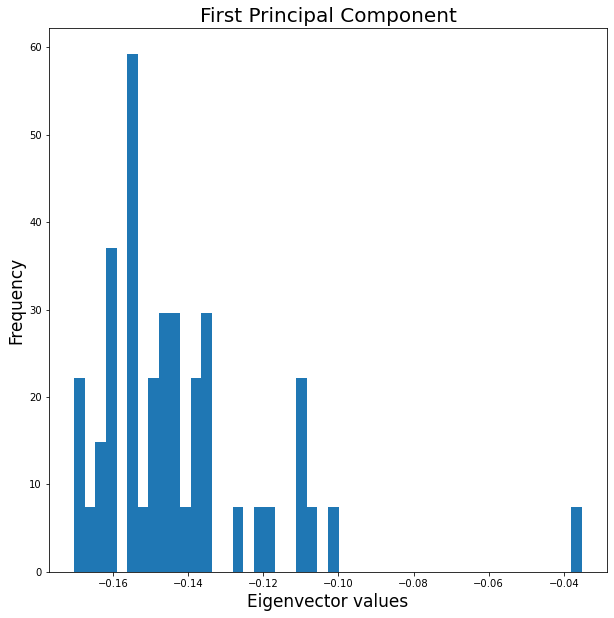

In [58]:
fig = plt.figure(figsize=(10,10))
plt.hist(eigenvectors[0], density= True, bins= 48 )
plt.ylabel("Frequency",fontsize=17)
plt.xlabel("Eigenvector values",fontsize=17)
plt.title("First Principal Component",fontsize=20)
plt.savefig('first pca entry.png')

In [26]:
a=[]
        
for i in eigenvectors[0]:

    a.append(i)
    
a=pd.DataFrame(a)
a.index= df4.columns
a.rename(columns = {0 : 'Vector_Entry'}, inplace = True)
a1=a.sort_values(by='Vector_Entry', ascending=False)
a1
#a1.to_excel(r'C:\Users\kwsta\Desktop\1_pca.xlsx')

,Vector_Entry
Gold,-0.035267
Smoke,-0.100259
Coal,-0.105921
Guns,-0.108896
Agric,-0.110231
Soda,-0.110303
Beer,-0.119145
Ships,-0.121584
Hlth,-0.126053
FabPr,-0.133986


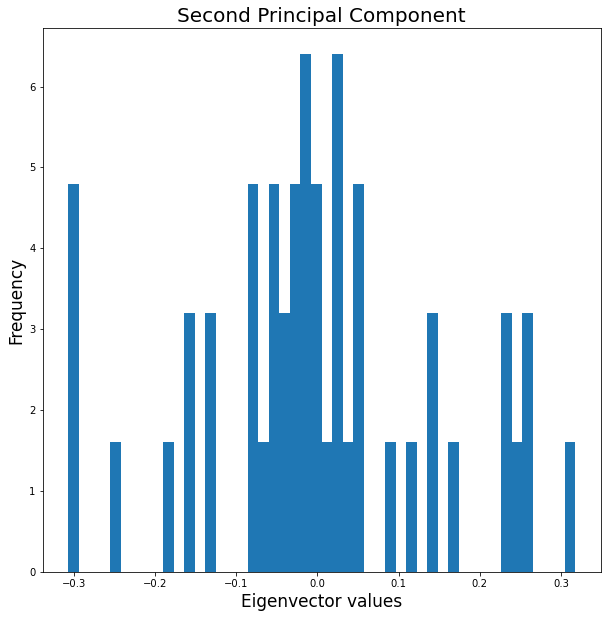

In [59]:
fig = plt.figure(figsize=(10,10))
plt.hist(eigenvectors[1], density= True, bins= 48 )
plt.ylabel("Frequency",fontsize=17)
plt.xlabel("Eigenvector values",fontsize=17)
plt.title("Second Principal Component",fontsize=20)
plt.savefig('second PCA.png')

In [28]:
print(eigenvectors[1])

[-0.08406782  0.25286204  0.23157804  0.31751247  0.25706027  0.04849197
 -0.01696902  0.00185981  0.25104466  0.0141772   0.11522947  0.16989969
  0.23875045 -0.06327717 -0.04475379 -0.07508856 -0.03917511 -0.15209651
 -0.25065918 -0.1776769  -0.16007721 -0.02147299 -0.04904256  0.02781904
 -0.05729319  0.09579723 -0.2978439  -0.3041759  -0.30723645 -0.13284386
  0.04326253  0.04511087  0.02814406 -0.01208443 -0.02800304 -0.05739608
 -0.03057745  0.03102199 -0.0108246  -0.01601472  0.00324026  0.13861535
  0.13848548 -0.00746445  0.04784193 -0.13643358 -0.08067735  0.02609256]


In [29]:
b=[]
        
for i in eigenvectors[1]:

    b.append(i)
    
b=pd.DataFrame(b)
b.index= df4.columns
b.rename(columns = {0 : 'Vector_Entry'}, inplace = True)
b1=b.sort_values(by='Vector_Entry', ascending=True)
b1
#b1.to_excel(r'C:\Users\Giorgia\Desktop\second_pca.xlsx')

,Vector_Entry
Coal,-0.307236
Mines,-0.304176
Gold,-0.297844
Steel,-0.250659
FabPr,-0.177677
Mach,-0.160077
Cnstr,-0.152097
RlEst,-0.136434
Oil,-0.132844
Agric,-0.084068


In [30]:
b1.index

Index(['Coal', 'Mines', 'Gold', 'Steel', 'FabPr', 'Mach', 'Cnstr', 'RlEst',
       'Oil', 'Agric', 'Fin', 'Txtls', 'Chems', 'Chips', 'Ships', 'Autos',
       'Rubbr', 'BldMt', 'LabEq', 'Comps', 'ElcEq', 'Fun', 'Trans', 'BusSv',
       'Boxes', 'Banks', 'Books', 'Whlsl', 'Clths', 'Other', 'Aero', 'PerSv',
       'Paper', 'Util', 'Telcm', 'Insur', 'Toys', 'Guns', 'Hlth', 'Meals',
       'Rtail', 'MedEq', 'Soda', 'Drugs', 'Hshld', 'Food', 'Smoke', 'Beer'],
      dtype='object')

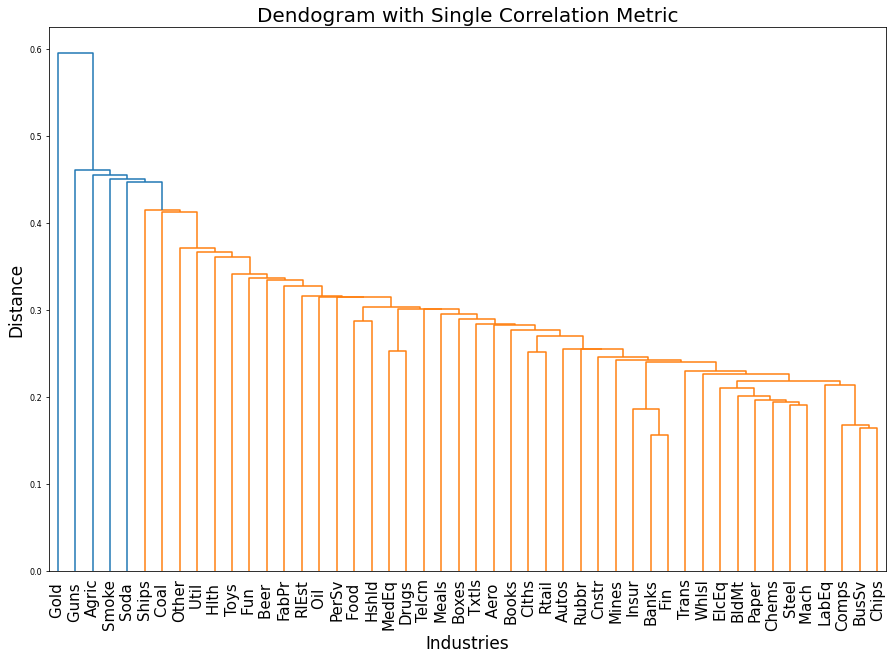

In [70]:
#Hierarchical
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import *
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
z= pdist(df4.T, metric= 'correlation')  #transpose because we need to have m rows,
l = linkage(z, 'single')
fig = plt.figure(figsize=(15, 10))
dn = dendrogram(l, labels= ['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans',
       'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ', 'Other'])
ax=plt.gca()
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.axhline(y=1, color='r', linestyle='--')
plt.title("Dendogram with Single Correlation Metric",fontsize=20)

plt.ylabel ("Distance",fontsize=17)
plt.xlabel ("Industries",fontsize=17)
plt.savefig('dendogram single correlation distance.png')

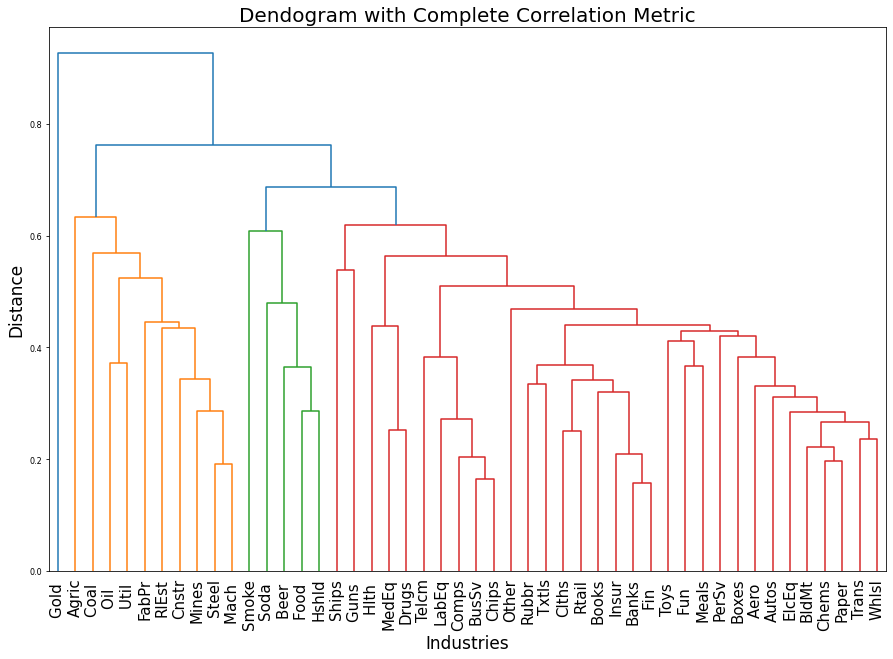

In [71]:
l = linkage(z, 'complete')
fig = plt.figure(figsize=(15, 10))
dn = dendrogram(l, labels= ['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans',
       'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ', 'Other'])
ax=plt.gca()
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.axhline(y=1, color='r', linestyle='--')
plt.title("Dendogram with Complete Correlation Metric",fontsize=20)
plt.ylabel ("Distance",fontsize=17)
plt.xlabel ("Industries",fontsize=17)
plt.savefig('dendogram complete correlation distance.png')

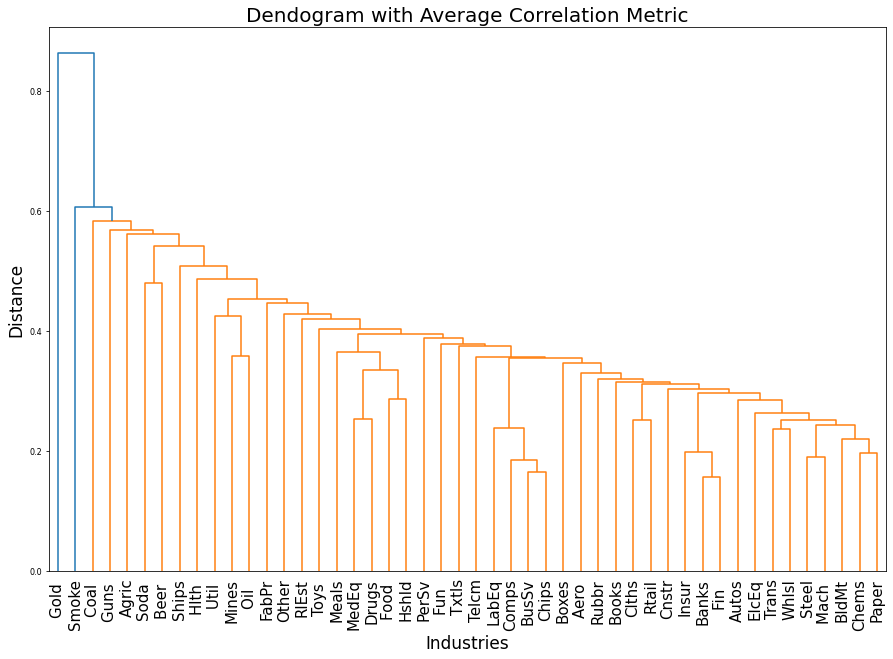

In [72]:
l = linkage(z, 'average')
fig = plt.figure(figsize=(15, 10))
dn = dendrogram(l, labels= ['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans',
       'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ', 'Other'])
ax=plt.gca()
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.axhline(y=1, color='r', linestyle='--')
plt.title("Dendogram with Average Correlation Metric",fontsize=20)
plt.ylabel ("Distance",fontsize=17)
plt.xlabel ("Industries",fontsize=17)
plt.savefig('dendogram average correlation distance.png')